# 1. Linear Regression

$$
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
\times
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
x_1^{(3)} & x_2^{(3)} & \cdots & x_n^{(3)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
+ b =
\begin{bmatrix}
y^{(1)} & y^{(2)} & \dots & y^{(m)}
\end{bmatrix}
$$

with (i) as the number of iteration, with i = 0 as the input 

or it can be interpreted as:
$$
W.X + b = Y
$$
to find W, we have:

$$
W= \frac{\text{Y  -  b}}{\text{X}}\huge
$$
given that Y-b as b has been accounted inside y
$$
\begin{bmatrix}
y^{(1)}-b & y^{(2)}-b & \dots & y^{(m)}-b
\end{bmatrix}
$$
with X^T (or in python we can make this as `X.T`), X^T is the transpose of X, with the column -> row and vice versa, meaning the X is in n x m size, the X^T is m x n

$$
X^T(X.W - Y) = 0
$$
$$
X^T.X.W - X^T.Y = 0
$$
$$
X^T.X.W = X^T.Y
$$
$$
w=(X^T.X)^{−1}X^T.y
$$

Taking the gradient of the loss with respect to $\boldsymbol{\beta}$ yields (MSE)

$$
\nabla_{\boldsymbol{\beta}} \mathcal{L}
= \frac{1}{n} X^\top (X\boldsymbol{\beta} - \mathbf{y}).
$$

> ## Update Equation for Weight (and also for bias)
> $$
> \boxed{
> \boldsymbol{\beta}^{(t+1)}
> =
> \boldsymbol{\beta}^{(t)}
> -
> \eta \cdot \frac{1}{n} X^\top
> \left( X\boldsymbol{\beta}^{(t)} - \mathbf{y} \right)
> }
> $$


### Coordinate-wise Update

Equivalently, for each coefficient $\beta_j$,

$$
\beta_j^{(t+1)}
=
\beta_j^{(t)}
-
\eta \cdot \frac{1}{n}
\sum_{i=1}^{n}
\left( \hat{y}_i - y_i \right) x_i^j,
$$

where

$$
\hat{y}_i = \sum_{k=0}^{m} \beta_k x_i^k.
$$

---

### Connection to the Normal Equation

Setting the gradient to zero recovers the normal equation

$$
(X^\top X)\boldsymbol{\beta} = X^\top \mathbf{y},
$$

which gradient descent solves iteratively without explicitly computing $(X^\top X)^{-1}$.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
np.random.seed(0)

n_samples = 100
X = 2 * np.random.rand(n_samples, 1)          # shape (n, 1)
true_w = 3.0
true_b = 4.0
noise = np.random.randn(n_samples)

y = true_b + true_w * X[:, 0] + noise          # y = 4 + 3x + noise
(X,y)

(array([[1.09762701],
        [1.43037873],
        [1.20552675],
        [1.08976637],
        [0.8473096 ],
        [1.29178823],
        [0.87517442],
        [1.783546  ],
        [1.92732552],
        [0.76688304],
        [1.58345008],
        [1.05778984],
        [1.13608912],
        [1.85119328],
        [0.14207212],
        [0.1742586 ],
        [0.04043679],
        [1.66523969],
        [1.5563135 ],
        [1.7400243 ],
        [1.95723668],
        [1.59831713],
        [0.92295872],
        [1.56105835],
        [0.23654885],
        [1.27984204],
        [0.28670657],
        [1.88933783],
        [1.04369664],
        [0.82932388],
        [0.52911122],
        [1.54846738],
        [0.91230066],
        [1.1368679 ],
        [0.0375796 ],
        [1.23527099],
        [1.22419145],
        [1.23386799],
        [1.88749616],
        [1.3636406 ],
        [0.7190158 ],
        [0.87406391],
        [1.39526239],
        [0.12045094],
        [1.33353343],
        [1

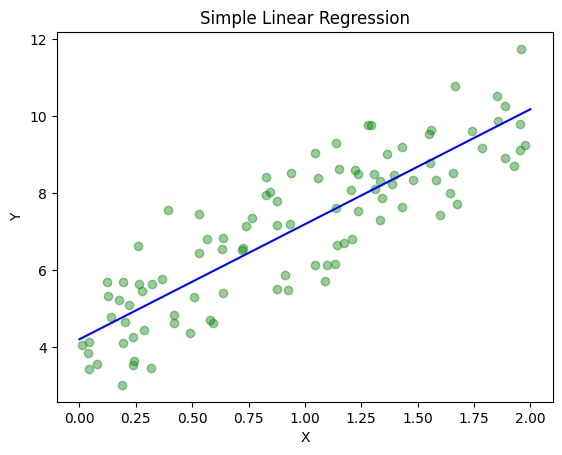

Slope (w): 2.99025910100489
Intercept (b): 4.206340188711437


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

X_input = np.linspace(0,2,100).reshape(-1,1)
y_input = model.predict(X_input)

plt.figure()
plt.scatter(X,y, color = "green", alpha = 0.4)
plt.plot(X_input, y_input, color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

print("Slope (w):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# 1.2 Ridge Linear Regression

## Ridge Linear Regression (L2-Regularized Linear Regression)

We start from the standard linear regression model:

$$
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
x_1^{(3)} & x_2^{(3)} & \cdots & x_n^{(3)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
+ b
=
\begin{bmatrix}
y^{(1)} & y^{(2)} & \dots & y^{(m)}
\end{bmatrix}
$$

This can be written compactly as:

$$
X\mathbf{w} + b = \mathbf{y}
$$

---

## Loss Function (with Ridge Regularization)

In Ridge regression, we **penalize large weights** by adding an L2 regularization term.

The Mean Squared Error loss becomes:

$$
\mathcal{L}(\mathbf{w})
=
\frac{1}{2m} \| X\mathbf{w} - \mathbf{y} \|_2^2
+
\frac{\lambda}{2m} \| \mathbf{w} \|_2^2
$$

where:
- $\lambda \ge 0$ is the **regularization strength** -> changable not fixed nor depended on anything
- the bias $b$ is **not regularized**
- m = number of training samples

---

## Gradient of the Ridge Loss

Taking the gradient with respect to $\mathbf{w}$:

$$
\nabla_{\mathbf{w}} \mathcal{L}
=
\frac{1}{m} X^\top (X\mathbf{w} - \mathbf{y})
+
\frac{\lambda}{m} \mathbf{w}
$$

Compare this with linear regression:

- Linear: $\frac{1}{m} X^\top (X\mathbf{w} - \mathbf{y})$
- Ridge: **adds** $\frac{\lambda}{m}\mathbf{w}$

---

## Update Equation for Weights (Ridge Gradient Descent)

> ### Ridge Gradient Descent Update
> $$
> \boxed{
> \mathbf{w}^{(t+1)}
> =
> \mathbf{w}^{(t)}
> -
> \eta
> \left[
> \frac{1}{m} X^\top
> \left( X\mathbf{w}^{(t)} - \mathbf{y} \right)
> +
> \frac{\lambda}{m} \mathbf{w}^{(t)}
> \right]
> }
> $$

### Bias Update (unchanged)

Since the bias is not regularized:

$$
b^{(t+1)}
=
b^{(t)}
-
\eta \cdot \frac{1}{m}
\sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$

---

## Coordinate-wise Update (Ridge)

For each weight $w_j$:

$$
w_j^{(t+1)}
=
w_j^{(t)}
-
\eta
\left[
\frac{1}{m}
\sum_{i=1}^{m}
(\hat{y}_i - y_i)x_j^{(i)}
+
\frac{\lambda}{m} w_j^{(t)}
\right]
$$

where:

$$
\hat{y}_i = \sum_{k=1}^{n} w_k x_k^{(i)} + b
$$

---

## Normal Equation (Ridge Regression)

Setting the gradient to zero yields the **Ridge normal equation**:

$$
(X^\top X + \lambda I)\mathbf{w} = X^\top \mathbf{y}
$$

Solving for $\mathbf{w}$:

$$
\boxed{
\mathbf{w}
=
(X^\top X + \lambda I)^{-1} X^\top \mathbf{y}
}
$$

---


## One-Sentence Summary

> **Ridge regression modifies linear regression by adding an L2 penalty on the weights, leading to the update rule $\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \left[\frac{1}{m}X^\top(X\mathbf{w}-\mathbf{y}) + \frac{\lambda}{m}\mathbf{w}\right]$ and the closed-form solution $(X^\top X + \lambda I)^{-1}X^\top y$.**


In [4]:
linear_reg_lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha = 1.0))
])

# Example data
X = np.random.randn(200, 5)
true_w = np.array([3, 0, 0, 2, 0]) # -> 3x_1 + 0x_2 + 0x_3 + 2x_4 + 0x_5 = y
y = X @ true_w + np.random.randn(200) * 0.5

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linear_reg_lasso_pipeline.fit(X_train, y_train)

y_pred = linear_reg_lasso_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

ridge_model = linear_reg_lasso_pipeline.named_steps["ridge"]

print("Learned coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)



MSE: 0.2877498316739368
Learned coefficients: [ 3.03599865e+00  1.01535907e-03 -9.47700963e-04  1.95533018e+00
 -2.15129692e-02]
Intercept: -0.4461017788186246


## Cross-Validation Loss (k-Fold)

Let the dataset be

$$
\mathcal{D} = \{(x_i, y_i)\}_{i=1}^{m}
$$

Split the dataset into $k$ disjoint folds:

$$
\mathcal{D}_1, \mathcal{D}_2, \dots, \mathcal{D}_k
$$

such that

$$
\mathcal{D}_j \cap \mathcal{D}_\ell = \varnothing \quad (j \neq \ell),
\qquad
\bigcup_{j=1}^{k} \mathcal{D}_j = \mathcal{D}.
$$

---

## Training and Validation Sets

For fold $j$:

**Training set**
$$
\mathcal{D}_{\text{train}}^{(j)} = \mathcal{D} \setminus \mathcal{D}_j
$$

**Validation set**
$$
\mathcal{D}_{\text{val}}^{(j)} = \mathcal{D}_j
$$

---

## Ridge Regression Training (per fold)

For a fixed regularization parameter $\lambda$, train Ridge regression on the training set:

$$
\hat{\boldsymbol{\beta}}^{(j)}(\lambda)
=
\arg\min_{\boldsymbol{\beta}}
\left[
\frac{1}{2|\mathcal{D}_{\text{train}}^{(j)}|}
\left\| X_{\text{train}}^{(j)}\boldsymbol{\beta}
-
\mathbf{y}_{\text{train}}^{(j)} \right\|_2^2
+
\frac{\lambda}{2|\mathcal{D}_{\text{train}}^{(j)}|}
\|\boldsymbol{\beta}\|_2^2
\right]
$$

---

## Validation Loss (per fold)

Evaluate the trained model on the validation set:

$$
\mathcal{L}_{\text{val}}^{(j)}(\lambda)
=
\frac{1}{|\mathcal{D}_{\text{val}}^{(j)}|}
\sum_{(x_i,y_i)\in \mathcal{D}_{\text{val}}^{(j)}}
\left(
y_i - x_i^\top \hat{\boldsymbol{\beta}}^{(j)}(\lambda)
\right)^2
$$

---

## Cross-Validation Loss

The k-fold cross-validation loss is the average validation loss:

$$
\mathcal{L}_{\text{CV}}(\lambda)
=
\frac{1}{k}
\sum_{j=1}^{k}
\mathcal{L}_{\text{val}}^{(j)}(\lambda)
$$

---

## Hyperparameter Selection

Choose the regularization parameter that minimizes the CV loss:

$$
\lambda^*
=
\arg\min_{\lambda}
\mathcal{L}_{\text{CV}}(\lambda)
$$

---

## Final Model (after CV)

Retrain Ridge regression on the full dataset using $\lambda^*$:

$$
\hat{\boldsymbol{\beta}}_{\text{final}}
=
\arg\min_{\boldsymbol{\beta}}
\left[
\frac{1}{2m}\|X\boldsymbol{\beta}-\mathbf{y}\|_2^2
+
\frac{\lambda^*}{2m}\|\boldsymbol{\beta}\|_2^2
\right]
$$

## Aggregated Cross-Validation Objective (Single Equation)

$$
\boxed{
\lambda^*
=
\arg\min_{\lambda}
\;
\frac{1}{k}
\sum_{j=1}^{k}
\;
\frac{1}{|\mathcal{D}_j|}
\sum_{(x_i,y_i)\in\mathcal{D}_j}
\left(
y_i
-
x_i^\top
\underset{\boldsymbol{\beta}}{\arg\min}
\left[
\frac{1}{2|\mathcal{D}\setminus\mathcal{D}_j|}
\left\|X_{-j}\boldsymbol{\beta}-\mathbf{y}_{-j}\right\|_2^2
+
\frac{\lambda}{2|\mathcal{D}\setminus\mathcal{D}_j|}
\|\boldsymbol{\beta}\|_2^2
\right]
\right)^2
}
$$



In [5]:
from sklearn.linear_model import RidgeCV

ridge_cv_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge_cv", RidgeCV(
        alphas=np.logspace(-4, 4, 50),
        cv=5
    ))
])

ridge_cv_pipeline.fit(X_train, y_train)

print("Best alpha:", ridge_cv_pipeline.named_steps["ridge_cv"].alpha_)
print("Coefficients:", ridge_cv_pipeline.named_steps["ridge_cv"].coef_)


Best alpha: 0.5689866029018293
Coefficients: [ 3.04374265e+00  7.44225629e-04 -7.02342118e-04  1.95978350e+00
 -2.20605429e-02]


# 1.3 Lasso Regression

## LASSO Linear Regression (L1-Regularized Linear Regression)

We start from the standard linear regression model:

$$
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
x_1^{(3)} & x_2^{(3)} & \cdots & x_n^{(3)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
+ b
=
\begin{bmatrix}
y^{(1)} & y^{(2)} & \dots & y^{(m)}
\end{bmatrix}
$$

This can be written compactly as:

$$
X\mathbf{w} + b = \mathbf{y}
$$

---

## Loss Function (with LASSO Regularization)

In LASSO regression, we **penalize large weights using the L1 norm**, encouraging sparsity.

The Mean Squared Error loss becomes:

$$
\mathcal{L}(\mathbf{w})
=
\frac{1}{2m} \| X\mathbf{w} - \mathbf{y} \|_2^2
+
\frac{\lambda}{m} \| \mathbf{w} \|_1
$$

-> L1 so not squared
where:
- $\lambda \ge 0$ is the **regularization strength** (tunable hyperparameter)
- $\|\mathbf{w}\|_1 = \sum_{j=1}^{n} |w_j|$
- the bias $b$ is **not regularized**
- $m$ is the number of training samples

---

## Subgradient of the LASSO Loss

The L1 norm is **not differentiable**


In [6]:
lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),   # very important for Lasso
    ("lasso", Lasso(alpha=0.1, max_iter=10000))
])

# Example data
X = np.random.randn(200, 5)
true_w = np.array([3, 0, 0, 2, 0])   # sparse true weights
y = X @ true_w + np.random.randn(200) * 0.5

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model
lasso_pipeline.fit(X_train, y_train)

# Predict
y_pred = lasso_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
lasso_model = lasso_pipeline.named_steps["lasso"]
print("Learned coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)


MSE: 0.24108425701166153
Learned coefficients: [ 3.02686856 -0.          0.          2.05373557  0.        ]
Intercept: 0.06330908851996196


## Cross-Validation Loss (k-Fold) — LASSO

Let the dataset be

$$
\mathcal{D} = \{(x_i, y_i)\}_{i=1}^{m}
$$

Split the dataset into $k$ disjoint folds:

$$
\mathcal{D}_1, \mathcal{D}_2, \dots, \mathcal{D}_k
$$

such that

$$
\mathcal{D}_j \cap \mathcal{D}_\ell = \varnothing \quad (j \neq \ell),
\qquad
\bigcup_{j=1}^{k} \mathcal{D}_j = \mathcal{D}.
$$

---

## Training and Validation Sets

For fold $j$:

**Training set**
$$
\mathcal{D}_{\text{train}}^{(j)} = \mathcal{D} \setminus \mathcal{D}_j
$$

**Validation set**
$$
\mathcal{D}_{\text{val}}^{(j)} = \mathcal{D}_j
$$

---

## LASSO Regression Training (per fold)

For a fixed regularization parameter $\lambda$, train LASSO regression on the training set:

$$
\hat{\boldsymbol{\beta}}^{(j)}(\lambda)
=
\arg\min_{\boldsymbol{\beta}}
\left[
\frac{1}{2|\mathcal{D}_{\text{train}}^{(j)}|}
\left\| X_{\text{train}}^{(j)}\boldsymbol{\beta}
-
\mathbf{y}_{\text{train}}^{(j)} \right\|_2^2
+
\frac{\lambda}{|\mathcal{D}_{\text{train}}^{(j)}|}
\|\boldsymbol{\beta}\|_1
\right]
$$

where

$$
\|\boldsymbol{\beta}\|_1 = \sum_{r=1}^{n} |\beta_r|.
$$

---

## Validation Loss (per fold)

Evaluate the trained model on the validation set:

$$
\mathcal{L}_{\text{val}}^{(j)}(\lambda)
=
\frac{1}{|\mathcal{D}_{\text{val}}^{(j)}|}
\sum_{(x_i,y_i)\in \mathcal{D}_{\text{val}}^{(j)}}
\left(
y_i - x_i^\top \hat{\boldsymbol{\beta}}^{(j)}(\lambda)
\right)^2
$$

---

## Cross-Validation Loss

The k-fold cross-validation loss is the average validation loss:

$$
\mathcal{L}_{\text{CV}}(\lambda)
=
\frac{1}{k}
\sum_{j=1}^{k}
\mathcal{L}_{\text{val}}^{(j)}(\lambda)
$$

---

## Hyperparameter Selection

Choose the regularization parameter that minimizes the CV loss:

$$
\lambda^*
=
\arg\min_{\lambda}
\mathcal{L}_{\text{CV}}(\lambda)
$$

---

## Final Model (after CV)

Retrain LASSO regression on the full dataset using $\lambda^*$:

$$
\hat{\boldsymbol{\beta}}_{\text{final}}
=
\arg\min_{\boldsymbol{\beta}}
\left[
\frac{1}{2m}\|X\boldsymbol{\beta}-\mathbf{y}\|_2^2
+
\frac{\lambda^*}{m}\|\boldsymbol{\beta}\|_1
\right]
$$

---

## Aggregated Cross-Validation Objective (Single Equation)

$$
\boxed{
\lambda^*
=
\arg\min_{\lambda}
\;
\frac{1}{k}
\sum_{j=1}^{k}
\;
\frac{1}{|\mathcal{D}_j|}
\sum_{(x_i,y_i)\in\mathcal{D}_j}
\left(
y_i
-
x_i^\top
\underset{\boldsymbol{\beta}}{\arg\min}
\left[
\frac{1}{2|\mathcal{D}\setminus\mathcal{D}_j|}
\left\|X_{-j}\boldsymbol{\beta}-\mathbf{y}_{-j}\right\|_2^2
+
\frac{\lambda}{|\mathcal{D}\setminus\mathcal{D}_j|}
\|\boldsymbol{\beta}\|_1
\right]
\right)^2
}
$$


In [7]:
from sklearn.linear_model import LassoCV

lasso_cv_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso_cv", LassoCV(
        alphas=np.logspace(-4, 1, 50),
        cv=5,
        max_iter=10000
    ))
])

lasso_cv_pipeline.fit(X_train, y_train)

print("Best alpha:", lasso_cv_pipeline.named_steps["lasso_cv"].alpha_)
print("Coefficients:", lasso_cv_pipeline.named_steps["lasso_cv"].coef_)


Best alpha: 0.01757510624854793
Coefficients: [ 3.1090834  -0.          0.02987722  2.1387873   0.        ]


## Linear vs Ridge vs LASSO Regression (Side-by-Side)

### Linear Regression (No Regularization)

$$
\boxed{
\hat{\boldsymbol{\beta}}_{\text{Linear}}
=
\arg\min_{\boldsymbol{\beta}}
\;
\frac{1}{2m}
\left\|
X\boldsymbol{\beta} - \mathbf{y}
\right\|_2^2
}
$$

---

### Ridge Regression (L2 Regularization)

$$
\boxed{
\hat{\boldsymbol{\beta}}_{\text{Ridge}}
=
\arg\min_{\boldsymbol{\beta}}
\;
\frac{1}{2m}
\left\|
X\boldsymbol{\beta} - \mathbf{y}
\right\|_2^2
+
\frac{\lambda}{2m}
\left\|
\boldsymbol{\beta}
\right\|_2^2
}
$$

---

### LASSO Regression (L1 Regularization)

$$
\boxed{
\hat{\boldsymbol{\beta}}_{\text{LASSO}}
=
\arg\min_{\boldsymbol{\beta}}
\;
\frac{1}{2m}
\left\|
X\boldsymbol{\beta} - \mathbf{y}
\right\|_2^2
+
\frac{\lambda}{m}
\left\|
\boldsymbol{\beta}
\right\|_1
}
$$


## Linear vs Ridge vs LASSO (Unified Objective Form)

All three models minimize the same empirical risk with different regularization terms:

$$
\hat{\boldsymbol{\beta}}
=
\arg\min_{\boldsymbol{\beta}}
\left\{
\frac{1}{2m}
\left\|
X\boldsymbol{\beta} - \mathbf{y}
\right\|_2^2
+
\mathcal{R}(\boldsymbol{\beta})
\right\},
$$

where the regularization term $\mathcal{R}(\boldsymbol{\beta})$ is defined as

$$
\mathcal{R}(\boldsymbol{\beta})
=
\begin{cases}
0,
& \text{Linear Regression} \\[6pt]

\displaystyle
\frac{\lambda}{2m}
\left\|
\boldsymbol{\beta}
\right\|_2^2,
& \text{Ridge Regression (L2)} \\[10pt]

\displaystyle
\frac{\lambda}{m}
\left\|
\boldsymbol{\beta}
\right\|_1,
& \text{LASSO Regression (L1)}
\end{cases}
$$

---

## Aggregated Cross-Validation Objective (All Models)

The optimal regularization parameter $\lambda^*$ is chosen by minimizing the k-fold cross-validation loss:

$$
\boxed{
\lambda^*
=
\arg\min_{\lambda}
\;
\frac{1}{k}
\sum_{j=1}^{k}
\;
\frac{1}{|\mathcal{D}_j|}
\sum_{(x_i,y_i)\in\mathcal{D}_j}
\left(
y_i
-
x_i^\top
\hat{\boldsymbol{\beta}}^{(-j)}(\lambda)
\right)^2
}
$$

where the model parameters trained **excluding fold $j$** are given by

$$
\hat{\boldsymbol{\beta}}^{(-j)}(\lambda)
=
\arg\min_{\boldsymbol{\beta}}
\left\{
\frac{1}{2|\mathcal{D}\setminus\mathcal{D}_j|}
\left\|
X_{-j}\boldsymbol{\beta}-\mathbf{y}_{-j}
\right\|_2^2
+
\mathcal{R}_\lambda(\boldsymbol{\beta})
\right\}
$$

and

$$
\mathcal{R}_\lambda(\boldsymbol{\beta})
=
\begin{cases}
0,
& \text{Linear Regression} \\[6pt]

\displaystyle
\frac{\lambda}{2|\mathcal{D}\setminus\mathcal{D}_j|}
\left\|
\boldsymbol{\beta}
\right\|_2^2,
& \text{Ridge Regression} \\[10pt]

\displaystyle
\frac{\lambda}{|\mathcal{D}\setminus\mathcal{D}_j|}
\left\|
\boldsymbol{\beta}
\right\|_1,
& \text{LASSO Regression}
\end{cases}
$$

---

## Interpretation

- **Linear Regression**  
  No regularization → lowest bias, highest variance

- **Ridge Regression**  
  L2 penalty → coefficient shrinkage, numerical stability

- **LASSO Regression**  
  L1 penalty → sparsity and feature selection

Cross-validation selects the $\lambda$ that best balances **bias–variance tradeoff**.

---

## One-Line Master Equation (Ultra-Compact)

$$
\boxed{
\hat{\boldsymbol{\beta}}^{*}
=
\arg\min_{\boldsymbol{\beta}}
\;
\mathbb{E}_{\text{CV}}
\left[
\|X\boldsymbol{\beta}-\mathbf{y}\|_2^2
+
\mathcal{R}_\lambda(\boldsymbol{\beta})
\right]
}
$$
